# Attention Training in Schoolchildren Improves Attention but Fails to Enhance Fluid Intelligence

Justyna Sarzyńska, Dorota Żelechowska, Marcel Falkiewicz, and Edward Nęcka

In [1]:
require(gdata)
require(lme4)
require(lmerTest)
require(effects)
require(multcomp)
require(rstan)
require(psych)
require(afex)
require(knitr)
require(corrplot)
require(ppcor)

rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())

Loading required package: gdata
Warning message:
: package ‘gdata’ was built under R version 3.2.4gdata: read.xls support for 'XLS' (Excel 97-2004) files ENABLED.

gdata: read.xls support for 'XLSX' (Excel 2007+) files ENABLED.

Attaching package: ‘gdata’

Następujący obiekt został zakryty z ‘package:stats’:

    nobs

Następujący obiekt został zakryty z ‘package:utils’:

    object.size

Loading required package: lme4
Warning message:
: package ‘lme4’ was built under R version 3.2.4Loading required package: Matrix
Warning message:
: package ‘Matrix’ was built under R version 3.2.4Loading required package: lmerTest
Warning message:
: package ‘lmerTest’ was built under R version 3.2.4
Attaching package: ‘lmerTest’

Następujący obiekt został zakryty z ‘package:lme4’:

    lmer

Następujący obiekt został zakryty z ‘package:stats’:

    step

Loading required package: effects
Warning message:
: package ‘effects’ was built under R version 3.2.4Loading required package: multcomp
Warning mess

# Data preprocessing

## Load the data

In [2]:
data <- read.xls("/Users/marcel/projects/treningi_Justyna/dane_wszystkie.xlsx",1)

dim(data)

data$measurement <- data$measurement-1
data$measurement <- as.factor(data$measurement)
data$group <- as.factor(data$group)

data <- data[order(data$measurement),]
data$WZb <- data$WZ - data$d2fa - data$d2miss

[1] 147  13

## d' and bias calculation

In [3]:
niter   = 50000
nburnin = 5000

# Experimental group, pre-test
h = data$d2hit[data$group == "Experimental" & data$measurement == 0]
m = data$d2miss[data$group == "Experimental" & data$measurement == 0]
f = data$d2fa[data$group == "Experimental" & data$measurement == 0]
cr = data$d2cr[data$group == "Experimental" & data$measurement == 0]

s = h + m
n = f + cr 
k  = length(h)  


dataList = list(h = h, f = f, s = s, n = n, k = k)

ksamples <- stan(file="/Users/marcel/projects/treningi_Justyna/SDT_single.stan",data = dataList,iter=niter,chains=3,warmup=nburnin)
c1 = colMeans(extract(ksamples,c("c"),inc_warmup=F)$c)
d1 = colMeans(extract(ksamples,c("d"),inc_warmup=F)$d)


# Control group, pre-test
h = data$d2hit[data$group == "Control" & data$measurement == 0]
m = data$d2miss[data$group == "Control" & data$measurement == 0]
f = data$d2fa[data$group == "Control" & data$measurement == 0]
cr = data$d2cr[data$group == "Control" & data$measurement == 0]

s = h + m
n = f + cr 
k  = length(h)  


dataList = list(h = h, f = f, s = s, n = n, k = k)

ksamples <- stan(fit=ksamples,data = dataList,iter=niter,chains=3,warmup=nburnin)
c2 = colMeans(extract(ksamples,c("c"),inc_warmup=F)$c)
d2 = colMeans(extract(ksamples,c("d"),inc_warmup=F)$d)


# Experimental group, post-test
h = data$d2hit[data$group == "Experimental" & data$measurement == 1]
m = data$d2miss[data$group == "Experimental" & data$measurement == 1]
f = data$d2fa[data$group == "Experimental" & data$measurement == 1]
cr = data$d2cr[data$group == "Experimental" & data$measurement == 1]

s = h + m
n = f + cr 
k  = length(h)  


dataList = list(h = h, f = f, s = s, n = n, k = k)

ksamples <- stan(fit=ksamples,data = dataList,iter=niter,chains=3,warmup=nburnin)
c3 = colMeans(extract(ksamples,c("c"),inc_warmup=F)$c)
d3 = colMeans(extract(ksamples,c("d"),inc_warmup=F)$d)


# Control group, post-test
h = data$d2hit[data$group == "Control" & data$measurement == 1]
m = data$d2miss[data$group == "Control" & data$measurement == 1]
f = data$d2fa[data$group == "Control" & data$measurement == 1]
cr = data$d2cr[data$group == "Control" & data$measurement == 1]

s = h + m
n = f + cr 
k  = length(h)  


dataList = list(h = h, f = f, s = s, n = n, k = k)

ksamples <- stan(fit=ksamples,data = dataList,iter=niter,chains=3,warmup=nburnin)
c4 = colMeans(extract(ksamples,c("c"),inc_warmup=F)$c)
d4 = colMeans(extract(ksamples,c("d"),inc_warmup=F)$d)

# Experimental group, follow-up
h = data$d2hit[data$group == "Experimental" & data$measurement == 2]
m = data$d2miss[data$group == "Experimental" & data$measurement == 2]
f = data$d2fa[data$group == "Experimental" & data$measurement == 2]
cr = data$d2cr[data$group == "Experimental" & data$measurement == 2]

s = h + m
n = f + cr 
k  = length(h)  


dataList = list(h = h, f = f, s = s, n = n, k = k)

ksamples <- stan(fit=ksamples,data = dataList,iter=niter,chains=3,warmup=nburnin)
c5 = colMeans(extract(ksamples,c("c"),inc_warmup=F)$c)
d5 = colMeans(extract(ksamples,c("d"),inc_warmup=F)$d)

c6 = rep(NA,22)
d6 = rep(NA,22)

data$bias <- c(c1,c2,c3,c4,c5,c6)

data$dprime <- c(d1,d2,d3,d4,d5,d6)

Warning message:
: There were 521 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help.Warning message:
: Examine the pairs() plot to diagnose sampling problems


In [4]:
head(data)

,id,measurement,group,WZ,d2hit,d2miss,d2fa,d2cr,Raven,X,X.1,X.2,X.3,WZb,bias,dprime
1,1,0,Experimental,314,129,1,2,182,36,NA,NA,NA,NA,311,0.0189152910234118,4.52550145812138
2,2,0,Experimental,284,119,2,0,163,37,NA,NA,NA,NA,282,0.343180488222713,4.79161577714329
3,3,0,Experimental,247,106,1,0,140,29,NA,NA,NA,NA,246,0.259837634616627,4.88798279705405
4,4,0,Experimental,288,67,53,0,168,33,NA,NA,NA,NA,235,1.2701946988888,2.93829095926894
5,5,0,Experimental,328,103,39,14,172,34,NA,NA,NA,NA,275,0.420327595252393,2.10750030972647
6,6,0,Experimental,203,80,10,1,112,30,NA,NA,NA,NA,192,0.532411076566321,3.56825728543102


## Split the data

The experiment included three measurements for the experimental group and two measurements for the control group. In order to analyze the data with mixed-effects ANOVA, the data has to be split into two sub-datasets:
1. Measurements 1 and 2 for control and experimental group
2. Measurements 1, 2 and 3 for experimental group

In [5]:
data_m12 <- data[data$measurement == 0 | data$measurement == 1,]
data_exp <- data[data$group == "Experimental",]

# Data analysis

## Descriptive statistics

In [6]:
describeBy(data,c("group","measurement"))

Warning message:
In FUN(newX[, i], ...): brak argumentów w min; zwracanie wartości InfWarning message:
In FUN(newX[, i], ...): brak argumentów w min; zwracanie wartości InfWarning message:
In FUN(newX[, i], ...): brak argumentów w min; zwracanie wartości InfWarning message:
In FUN(newX[, i], ...): brak argumentów w min; zwracanie wartości InfWarning message:
In FUN(newX[, i], ...): brak argumentów w max; zwracanie wartości -InfWarning message:
In FUN(newX[, i], ...): brak argumentów w max; zwracanie wartości -InfWarning message:
In FUN(newX[, i], ...): brak argumentów w max; zwracanie wartości -InfWarning message:
In FUN(newX[, i], ...): brak argumentów w max; zwracanie wartości -InfWarning message:
In FUN(newX[, i], ...): brak argumentów w min; zwracanie wartości InfWarning message:
In FUN(newX[, i], ...): brak argumentów w min; zwracanie wartości InfWarning message:
In FUN(newX[, i], ...): brak argumentów w min; zwracanie wartości InfWarning message:
In FUN(newX[, i], ...): brak argu

group: Control
measurement: 0
             vars  n   mean    sd median trimmed   mad    min    max  range
id              1 22  42.50  6.92  42.50   42.50  8.15  31.00  54.00  23.00
measurement*    2 22   1.00  0.00   1.00    1.00  0.00   1.00   1.00   0.00
group*          3 22   1.00  0.00   1.00    1.00  0.00   1.00   1.00   0.00
WZ              4 22 237.55 66.16 222.00  232.89 54.11 140.00 408.00 268.00
d2hit           5 22  75.27 32.95  74.50   73.00 22.98  18.00 157.00 139.00
d2miss          6 22  13.00 11.74  10.00   11.11  6.67   0.00  48.00  48.00
d2fa            7 22   4.18  5.40   3.00    3.17  2.22   0.00  26.00  26.00
d2cr            8 22 145.09 41.98 131.50  142.17 40.03  86.00 234.00 148.00
Raven           9 22  27.68  8.07  27.00   27.94  5.19   9.00  41.00  32.00
X*             10  0    NaN    NA     NA     NaN    NA    Inf   -Inf   -Inf
X.1*           11  0    NaN    NA     NA     NaN    NA    Inf   -Inf   -Inf
X.2*           12  0    NaN    NA     NA     NaN    NA    

## Statistical tests

### Number of processed items

This is simply the number of items that each subject has processed within the given time.

#### Model

In [7]:
a_WZ_g <- aov_ez("id","WZ", data_m12, between = "group", within = "measurement")
a_WZ_e <- aov_ez("id","WZ", data_exp, within = "measurement")

Contrasts set to contr.sum for the following variables: group


In [8]:
knitr::kable(nice(a_WZ_g))
knitr::kable(nice(a_WZ_e))



|Effect            |df    |MSE     |F         |ges  |p.value |
|:-----------------|:-----|:-------|:---------|:----|:-------|
|group             |1, 47 |6111.40 |0.40      |.007 |.53     |
|measurement       |1, 47 |1179.19 |25.28 *** |.08  |<.0001  |
|group:measurement |1, 47 |1179.19 |2.24      |.008 |.14     |



|Effect      |df          |MSE     |F       |ges |p.value |
|:-----------|:-----------|:-------|:-------|:---|:-------|
|measurement |1.40, 36.36 |1713.41 |9.13 ** |.10 |.002    |

Only the effect of measurement is significant with F(1,47) = 25.28, p < .0001, eta-squared = .08

#### Contrasts

In [9]:
con_m21 <- list("Exp-Con Pre" = c(-1,1,0,0),
                "Post-pre Exp" = c(0,-1,0,1),
                 "Post-pre Con" = c(-1,0,1,0),
                 "Post-pre Exp-Con" = c(0,-1,0,1) - c(-1,0,1,0)          
)

con_exp <- list("Delayed post - pre" = c(-1, 0, 1),
                 "Delayed post - post" = c(0, -1, 1))

In [10]:
m_WZ_g = lsmeans(a_WZ_g, ~ group:measurement)
con_WZg = summary(as.glht(contrast(m_WZ_g, con_m21)), test = adjusted("Westfall"))
con_WZg
confint_WZg = confint(con_WZg)
confint_WZg


	 Simultaneous Tests for General Linear Hypotheses

Linear Hypotheses:
                      Estimate Std. Error t value Pr(>|t|)    
Exp-Con Pre == 0        0.3434    17.3409   0.020   0.9843    
Post-pre Exp == 0      24.6296     9.3460   2.635   0.0217 *  
Post-pre Con == 0      45.5000    10.3537   4.395   <0.001 ***
Post-pre Exp-Con == 0 -20.8704    13.9480  -1.496   0.2476    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- Westfall method)



	 Simultaneous Confidence Intervals

Fit: NULL

Quantile = 2.5129
95% family-wise confidence level
 

Linear Hypotheses:
                      Estimate lwr      upr     
Exp-Con Pre == 0        0.3434 -43.2327  43.9196
Post-pre Exp == 0      24.6296   1.1440  48.1153
Post-pre Con == 0      45.5000  19.4820  71.5180
Post-pre Exp-Con == 0 -20.8704 -55.9205  14.1797


<b>Conclusion</b>: Both groups have sped up after training

In [11]:
m_WZ_e = lsmeans(a_WZ_e, ~ measurement)
con_WZ_e = summary(as.glht(contrast(m_WZ_e, con_exp)), test = adjusted("Westfall"))
con_WZ_e
confint_WZe = confint(con_WZ_e)
confint_WZe


	 Simultaneous Tests for General Linear Hypotheses

Linear Hypotheses:
                         Estimate Std. Error t value Pr(>|t|)    
Delayed post - pre == 0   -15.259      9.421  -1.620 0.111337    
Delayed post - post == 0  -39.889      9.421  -4.234 0.000185 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- Westfall method)



	 Simultaneous Confidence Intervals

Fit: NULL

Quantile = 2.2737
95% family-wise confidence level
 

Linear Hypotheses:
                         Estimate lwr      upr     
Delayed post - pre == 0  -15.2593 -36.6797   6.1612
Delayed post - post == 0 -39.8889 -61.3093 -18.4685


<b>Conclusion</b>: The effect did not persist for the experimental group

### Perceptual ability

This is the number of processed items minus the number of committed errors

In [12]:
a_WZb_g <- aov_ez("id","WZb", data_m12, between = "group", within = "measurement")
a_WZb_e <- aov_ez("id","WZb", data_exp, within = "measurement")

Contrasts set to contr.sum for the following variables: group


In [13]:
knitr::kable(nice(a_WZb_g))
knitr::kable(nice(a_WZb_e))



|Effect            |df    |MSE     |F         |ges  |p.value |
|:-----------------|:-----|:-------|:---------|:----|:-------|
|group             |1, 47 |5676.31 |0.10      |.002 |.75     |
|measurement       |1, 47 |1193.81 |29.48 *** |.10  |<.0001  |
|group:measurement |1, 47 |1193.81 |0.73      |.003 |.40     |



|Effect      |df          |MSE     |F       |ges |p.value |
|:-----------|:-----------|:-------|:-------|:---|:-------|
|measurement |1.37, 35.68 |1579.79 |9.61 ** |.11 |.002    |

#### Contrasts


	 Simultaneous Tests for General Linear Hypotheses

Linear Hypotheses:
                      Estimate Std. Error t value Pr(>|t|)    
Exp-Con Pre == 0         1.044     16.833   0.062   0.9508    
Post-pre Exp == 0       32.111      9.404   3.415   0.0025 ** 
Post-pre Con == 0       44.091     10.418   4.232   <0.001 ***
Post-pre Exp-Con == 0  -11.980     14.034  -0.854   0.6139    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- Westfall method)



	 Simultaneous Confidence Intervals

Fit: NULL

Quantile = 2.5123
95% family-wise confidence level
 

Linear Hypotheses:
                      Estimate lwr      upr     
Exp-Con Pre == 0        1.0438 -41.2464  43.3340
Post-pre Exp == 0      32.1111   8.4863  55.7360
Post-pre Con == 0      44.0909  17.9188  70.2631
Post-pre Exp-Con == 0 -11.9798 -47.2376  23.2780


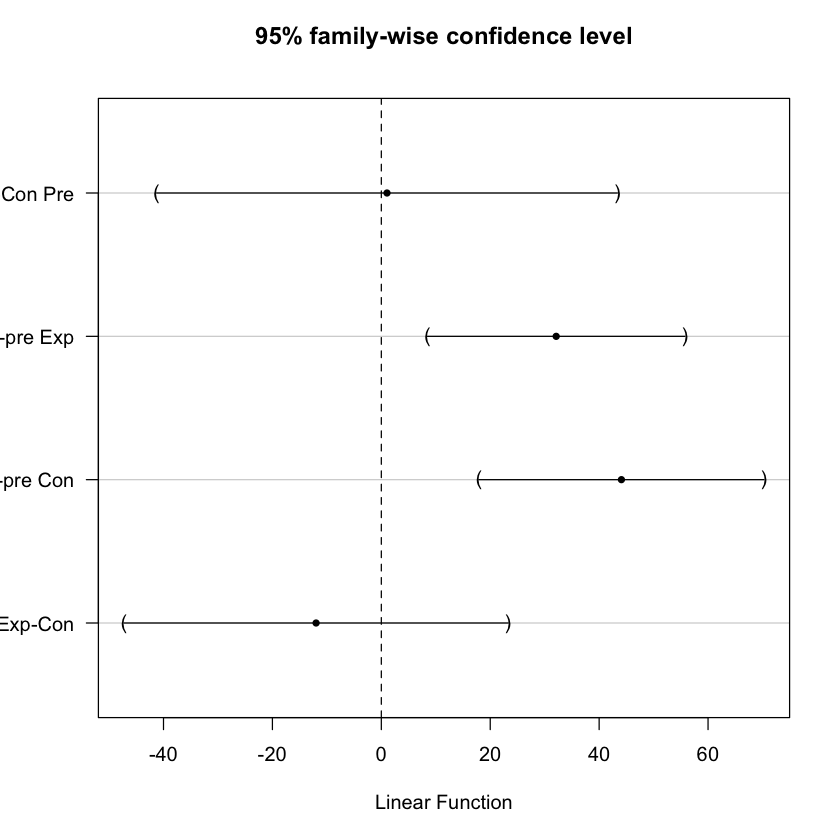

In [14]:
m_WZb_g = lsmeans(a_WZb_g, ~ group:measurement)
con_WZb_g = summary(as.glht(contrast(m_WZb_g, con_m21)), test = adjusted("Westfall"))
confint_WZb_g = confint(con_WZb_g)
plot(con_WZb_g)
con_WZb_g
confint_WZb_g

<b>Conclusion</b>: Both groups have increased their perceptual ability


	 Simultaneous Tests for General Linear Hypotheses

Linear Hypotheses:
                         Estimate Std. Error t value Pr(>|t|)    
Delayed post - pre == 0    -3.556      8.961  -0.397 0.693146    
Delayed post - post == 0  -35.667      8.961  -3.980 0.000421 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- Westfall method)



	 Simultaneous Confidence Intervals

Fit: NULL

Quantile = 2.2737
95% family-wise confidence level
 

Linear Hypotheses:
                         Estimate lwr      upr     
Delayed post - pre == 0   -3.5556 -23.9301  16.8190
Delayed post - post == 0 -35.6667 -56.0412 -15.2921


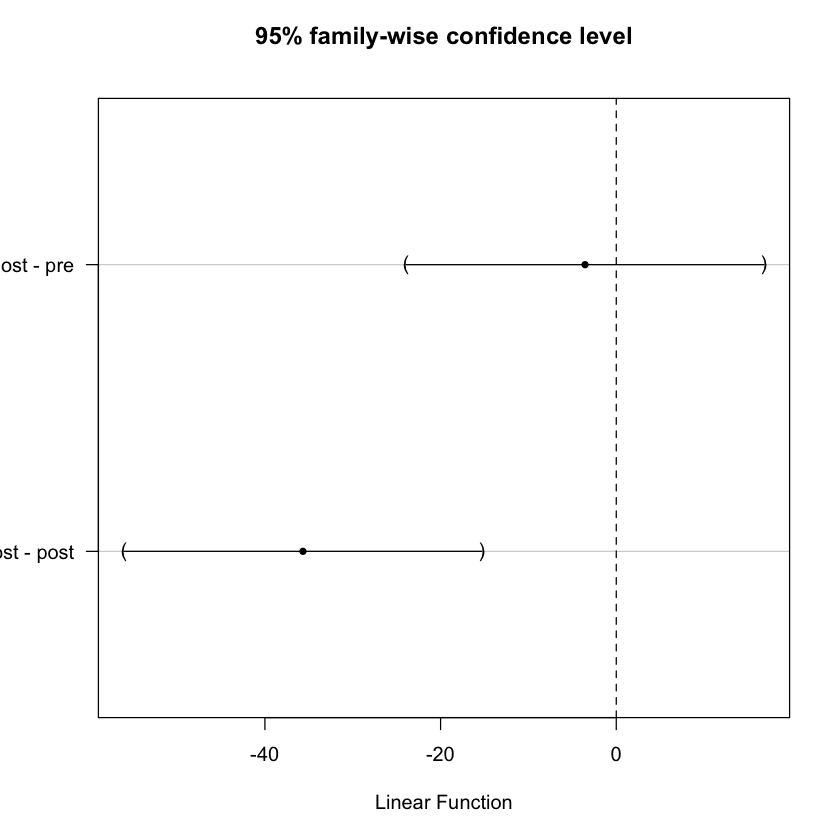

In [15]:
m_WZb_e = lsmeans(a_WZb_e, ~ measurement)
con_WZb_e = summary(as.glht(contrast(m_WZb_e, con_exp)), test = adjusted("Westfall"))
confint_WZb_e = confint(con_WZb_e)
plot(con_WZb_e)
con_WZb_e
confint_WZb_e

<b>Conclusion</b>: The effect diminished for the experimental group after three months

### d2: number of hits

In [16]:
a_d2hits_g <- aov_ez("id","d2hit", data_m12, between = "group", within = "measurement")
a_d2hits_e <- aov_ez("id","d2hit", data_exp, within = "measurement")
knitr::kable(nice(a_d2hits_g))
knitr::kable(nice(a_d2hits_e))

Contrasts set to contr.sum for the following variables: group




|Effect            |df    |MSE     |F         |ges  |p.value |
|:-----------------|:-----|:-------|:---------|:----|:-------|
|group             |1, 47 |1209.06 |2.55      |.04  |.12     |
|measurement       |1, 47 |320.68  |25.32 *** |.10  |<.0001  |
|group:measurement |1, 47 |320.68  |1.17      |.005 |.29     |



|Effect      |df          |MSE    |F       |ges |p.value |
|:-----------|:-----------|:------|:-------|:---|:-------|
|measurement |1.36, 35.31 |252.88 |8.12 ** |.09 |.004    |

#### Contrasts


	 Simultaneous Tests for General Linear Hypotheses

Linear Hypotheses:
                      Estimate Std. Error t value Pr(>|t|)    
Exp-Con Pre == 0        15.209      7.943   1.915  0.11047    
Post-pre Exp == 0       14.370      4.874   2.948  0.00932 ** 
Post-pre Con == 0       22.227      5.399   4.117  < 0.001 ***
Post-pre Exp-Con == 0   -7.857      7.274  -1.080  0.28496    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- Westfall method)



	 Simultaneous Confidence Intervals

Fit: NULL

Quantile = 2.5069
95% family-wise confidence level
 

Linear Hypotheses:
                      Estimate lwr      upr     
Exp-Con Pre == 0       15.2088  -4.7041  35.1216
Post-pre Exp == 0      14.3704   2.1522  26.5885
Post-pre Con == 0      22.2273   8.6918  35.7628
Post-pre Exp-Con == 0  -7.8569 -26.0913  10.3775


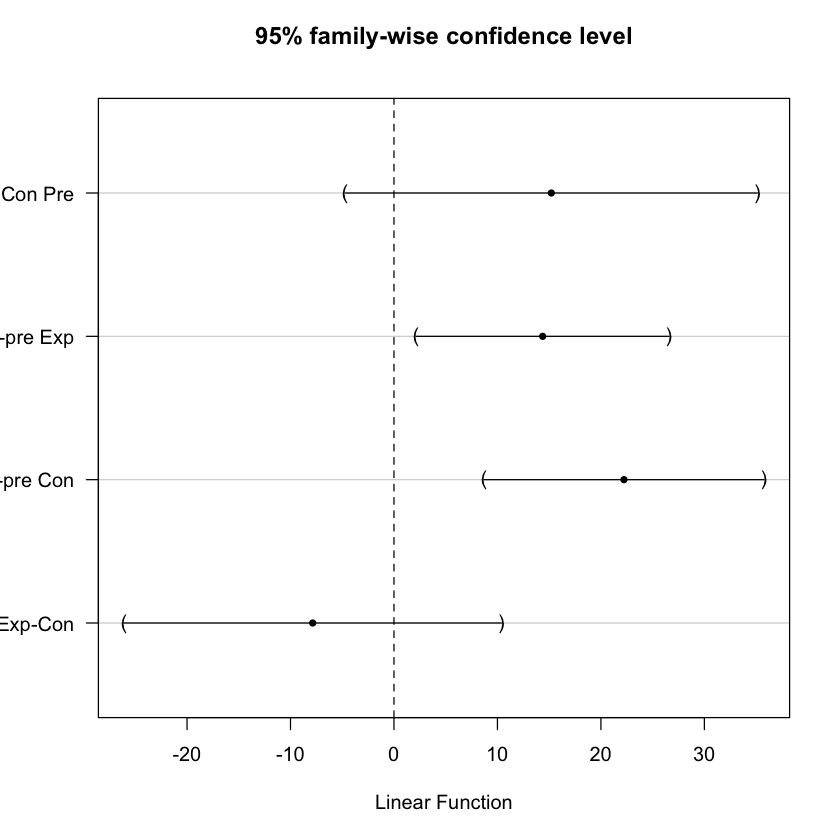

In [17]:
m_d2hits_g = lsmeans(a_d2hits_g, ~ group:measurement)
con_d2hits_g = summary(as.glht(contrast(m_d2hits_g, con_m21)), test = adjusted("Westfall"))
confint_d2hits_g = confint(con_d2hits_g)
plot(con_d2hits_g)
con_d2hits_g
confint_d2hits_g

<b>Conclusion</b>: Both groups have improved in terms of the number of hits


	 Simultaneous Tests for General Linear Hypotheses

Linear Hypotheses:
                         Estimate Std. Error t value Pr(>|t|)  
Delayed post - pre == 0     6.889      3.567   1.931   0.0742 .
Delayed post - post == 0   -7.481      3.567  -2.098   0.0742 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- Westfall method)



	 Simultaneous Confidence Intervals

Fit: NULL

Quantile = 2.2737
95% family-wise confidence level
 

Linear Hypotheses:
                         Estimate lwr      upr     
Delayed post - pre == 0    6.8889  -1.2206  14.9984
Delayed post - post == 0  -7.4815 -15.5910   0.6280


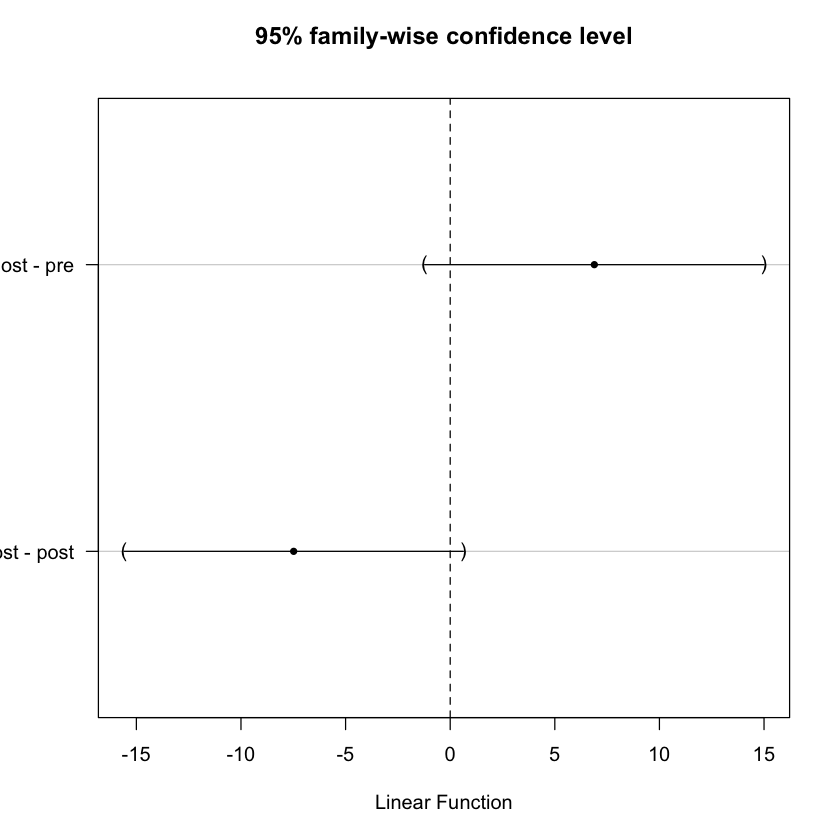

In [18]:
m_d2hits_e = lsmeans(a_d2hits_e, ~ measurement)
con_d2hits_e = summary(as.glht(contrast(m_d2hits_e, con_exp)), test = adjusted("Westfall"))
confint_d2hits_e = confint(con_d2hits_e)
plot(con_d2hits_e)
con_d2hits_e
confint_d2hits_e

<b>Conclusion</b>: In delayed post-test, the subjects are slightly faster compared to pre-test, but slightly slower compared to post-test

### d2: number of misses/omissions

In [19]:
a_d2miss_g <- aov_ez("id","d2miss", data_m12, between = "group", within = "measurement")
a_d2miss_e <- aov_ez("id","d2miss", data_exp, within = "measurement")
knitr::kable(nice(a_d2miss_g))
knitr::kable(nice(a_d2miss_e))

Contrasts set to contr.sum for the following variables: group




|Effect            |df    |MSE    |F    |ges  |p.value |
|:-----------------|:-----|:------|:----|:----|:-------|
|group             |1, 47 |254.30 |0.93 |.02  |.34     |
|measurement       |1, 47 |66.17  |2.36 |.01  |.13     |
|group:measurement |1, 47 |66.17  |1.33 |.006 |.25     |



|Effect      |df          |MSE    |F        |ges |p.value |
|:-----------|:-----------|:------|:--------|:---|:-------|
|measurement |1.68, 43.55 |103.08 |9.37 *** |.14 |.0008   |

#### Contrasts


	 Simultaneous Tests for General Linear Hypotheses

Linear Hypotheses:
                      Estimate Std. Error t value Pr(>|t|)
Exp-Con Pre == 0       -1.2222     3.6356  -0.336    0.927
Post-pre Exp == 0      -4.4444     2.2139  -2.008    0.150
Post-pre Con == 0      -0.6364     2.4526  -0.259    0.927
Post-pre Exp-Con == 0  -3.8081     3.3040  -1.153    0.418
(Adjusted p values reported -- Westfall method)



	 Simultaneous Confidence Intervals

Fit: NULL

Quantile = 2.5077
95% family-wise confidence level
 

Linear Hypotheses:
                      Estimate lwr      upr     
Exp-Con Pre == 0       -1.2222 -10.3393   7.8948
Post-pre Exp == 0      -4.4444  -9.9962   1.1073
Post-pre Con == 0      -0.6364  -6.7868   5.5140
Post-pre Exp-Con == 0  -3.8081 -12.0936   4.4774


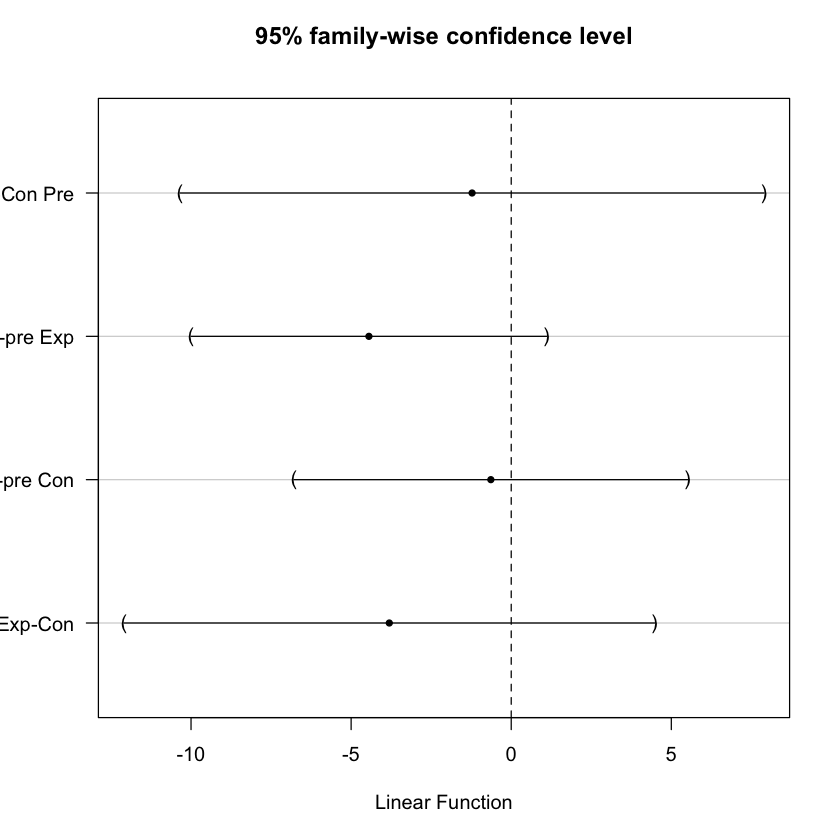

In [20]:
m_d2miss_g = lsmeans(a_d2miss_g, ~ group:measurement)
con_d2miss_g = summary(as.glht(contrast(m_d2miss_g, con_m21)), test = adjusted("Westfall"))
confint_d2miss_g = confint(con_d2miss_g)
plot(con_d2miss_g)
con_d2miss_g
confint_d2miss_g


	 Simultaneous Tests for General Linear Hypotheses

Linear Hypotheses:
                         Estimate Std. Error t value Pr(>|t|)    
Delayed post - pre == 0   -10.889      2.529  -4.306 0.000146 ***
Delayed post - post == 0   -6.444      2.529  -2.548 0.013815 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- Westfall method)



	 Simultaneous Confidence Intervals

Fit: NULL

Quantile = 2.2737
95% family-wise confidence level
 

Linear Hypotheses:
                         Estimate lwr      upr     
Delayed post - pre == 0  -10.8889 -16.6388  -5.1390
Delayed post - post == 0  -6.4444 -12.1944  -0.6945


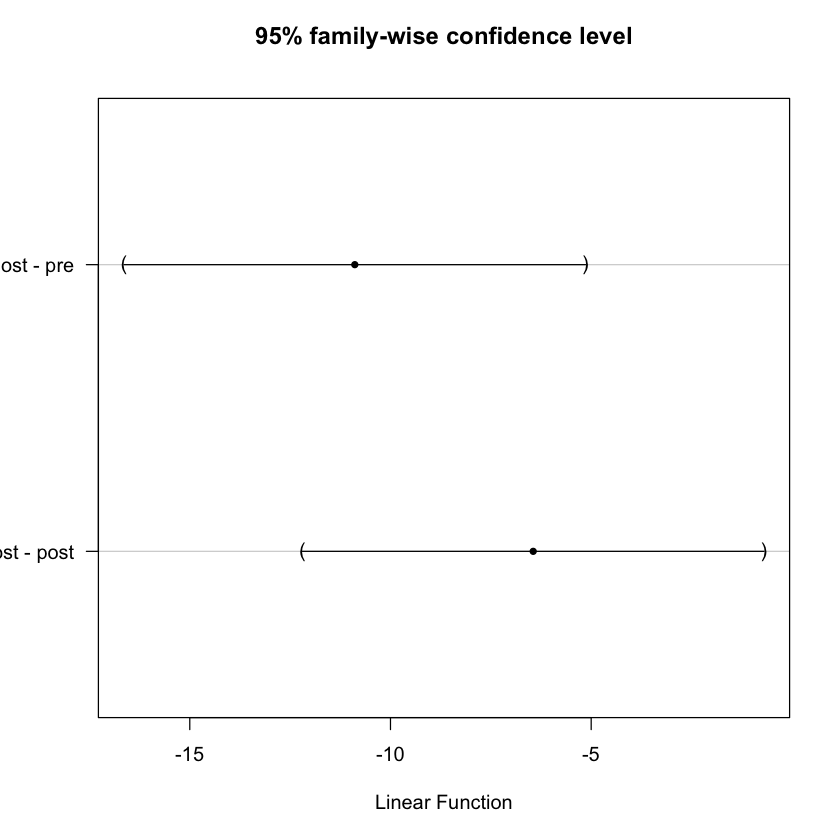

In [21]:
m_miss_e = lsmeans(a_d2miss_e, ~ measurement)
con_miss_e = summary(as.glht(contrast(m_miss_e, con_exp)), test = adjusted("Westfall"))
confint_miss_e = confint(con_miss_e)
plot(con_miss_e)
con_miss_e
confint_miss_e

<b>Conclusion</b>: The number of hits in the delayed post-test was significantly lower compared to pre-test, as well as post-test

### d2: number of false alarms

In [22]:
a_d2fa_g <- aov_ez("id","d2fa", data_m12, between = "group", within = "measurement")
a_d2fa_e <- aov_ez("id","d2fa", data_exp, within = "measurement")
knitr::kable(nice(a_d2fa_g))
knitr::kable(nice(a_d2fa_e))

Contrasts set to contr.sum for the following variables: group




|Effect            |df    |MSE   |F         |ges  |p.value |
|:-----------------|:-----|:-----|:---------|:----|:-------|
|group             |1, 47 |45.29 |2.18      |.04  |.15     |
|measurement       |1, 47 |10.34 |0.58      |.002 |.45     |
|group:measurement |1, 47 |10.34 |15.14 *** |.06  |.0003   |



|Effect      |df          |MSE   |F       |ges |p.value |
|:-----------|:-----------|:-----|:-------|:---|:-------|
|measurement |1.58, 41.01 |10.97 |7.71 ** |.13 |.003    |

#### Contrasts


	 Simultaneous Tests for General Linear Hypotheses

Linear Hypotheses:
                      Estimate Std. Error t value Pr(>|t|)   
Exp-Con Pre == 0        0.5219     1.5148   0.345  0.73184   
Post-pre Exp == 0      -3.0370     0.8752  -3.470  0.00209 **
Post-pre Con == 0       2.0455     0.9695   2.110  0.07538 . 
Post-pre Exp-Con == 0  -5.0825     1.3061  -3.891  0.00118 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- Westfall method)



	 Simultaneous Confidence Intervals

Fit: NULL

Quantile = 2.5097
95% family-wise confidence level
 

Linear Hypotheses:
                      Estimate lwr     upr    
Exp-Con Pre == 0       0.5219  -3.2798  4.3236
Post-pre Exp == 0     -3.0370  -5.2334 -0.8407
Post-pre Con == 0      2.0455  -0.3877  4.4787
Post-pre Exp-Con == 0 -5.0825  -8.3604 -1.8046


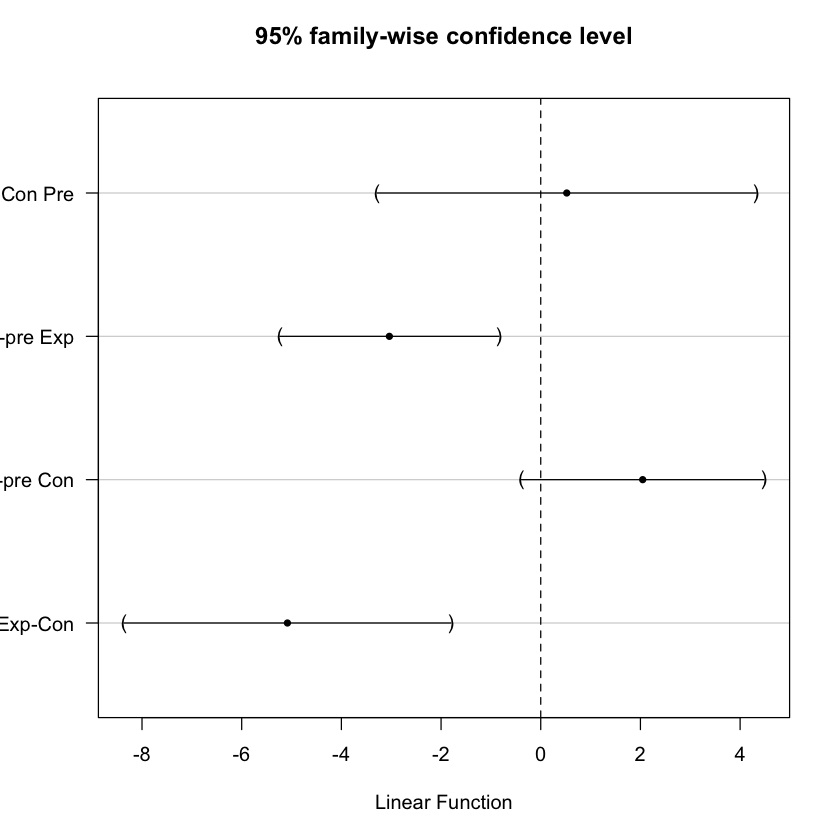

In [23]:
m_d2fa_g = lsmeans(a_d2fa_g, ~ group:measurement)
con_d2fa_g = summary(as.glht(contrast(m_d2fa_g, con_m21)), test = adjusted("Westfall"))
confint_d2fa_g = confint(con_d2fa_g)
plot(con_d2fa_g)
con_d2fa_g
confint_d2fa_g

<b>Conclusion</b>: The number of FA increased for the controls and decreased for the experimental group. The difference between groups was significant.


	 Simultaneous Tests for General Linear Hypotheses

Linear Hypotheses:
                         Estimate Std. Error t value Pr(>|t|)  
Delayed post - pre == 0   -0.8148     0.8006  -1.018   0.3135  
Delayed post - post == 0   2.2222     0.8006   2.776   0.0145 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- Westfall method)



	 Simultaneous Confidence Intervals

Fit: NULL

Quantile = 2.2737
95% family-wise confidence level
 

Linear Hypotheses:
                         Estimate lwr     upr    
Delayed post - pre == 0  -0.8148  -2.6351  1.0054
Delayed post - post == 0  2.2222   0.4020  4.0425


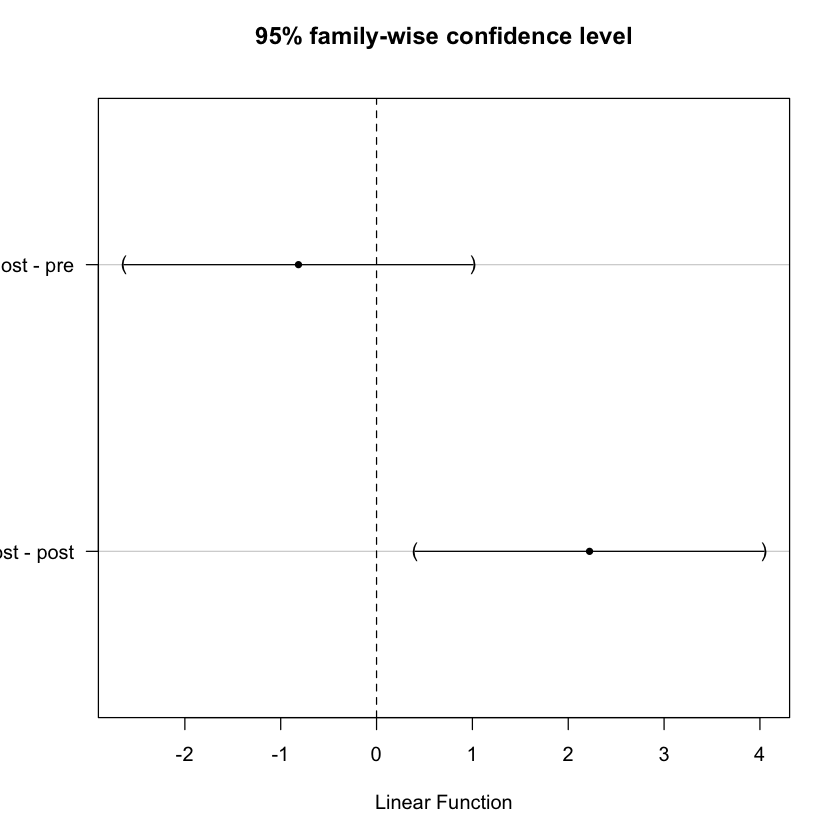

In [24]:
m_d2fa_e = lsmeans(a_d2fa_e, ~ measurement)
con_d2fa_e = summary(as.glht(contrast(m_d2fa_e, con_exp)), test = adjusted("Westfall"))
confint_d2fa_e = confint(con_d2fa_e)
plot(con_d2fa_e)
con_d2fa_e
confint_d2fa_e

<b>Conclusion</b>: The improvement for the experimental group did not persist and the number of false alarms returned to the initial level

### d2: discriminability

In [25]:
a_d2dp_g <- aov_ez("id","dprime", data_m12, between = "group", within = "measurement")
a_d2dp_e <- aov_ez("id","dprime", data_exp, within = "measurement")
knitr::kable(nice(a_d2dp_g))
knitr::kable(nice(a_d2dp_e))

Contrasts set to contr.sum for the following variables: group




|Effect            |df    |MSE  |F         |ges |p.value |
|:-----------------|:-----|:----|:---------|:---|:-------|
|group             |1, 47 |1.03 |9.12 **   |.13 |.004    |
|measurement       |1, 47 |0.30 |21.20 *** |.09 |<.0001  |
|group:measurement |1, 47 |0.30 |11.80 **  |.05 |.001    |



|Effect      |df          |MSE  |F         |ges |p.value |
|:-----------|:-----------|:----|:---------|:---|:-------|
|measurement |1.76, 45.75 |0.44 |20.96 *** |.31 |<.0001  |

#### Contrasts


	 Simultaneous Tests for General Linear Hypotheses

Linear Hypotheses:
                      Estimate Std. Error t value Pr(>|t|)    
Exp-Con Pre == 0        0.2436     0.2338   1.042  0.49644    
Post-pre Exp == 0       0.8870     0.1479   5.998  < 1e-04 ***
Post-pre Con == 0       0.1290     0.1638   0.788  0.49644    
Post-pre Exp-Con == 0   0.7580     0.2207   3.435  0.00226 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- Westfall method)



	 Simultaneous Confidence Intervals

Fit: NULL

Quantile = 2.5061
95% family-wise confidence level
 

Linear Hypotheses:
                      Estimate lwr     upr    
Exp-Con Pre == 0       0.2436  -0.3425  0.8296
Post-pre Exp == 0      0.8870   0.5164  1.2575
Post-pre Con == 0      0.1290  -0.2815  0.5395
Post-pre Exp-Con == 0  0.7580   0.2049  1.3110


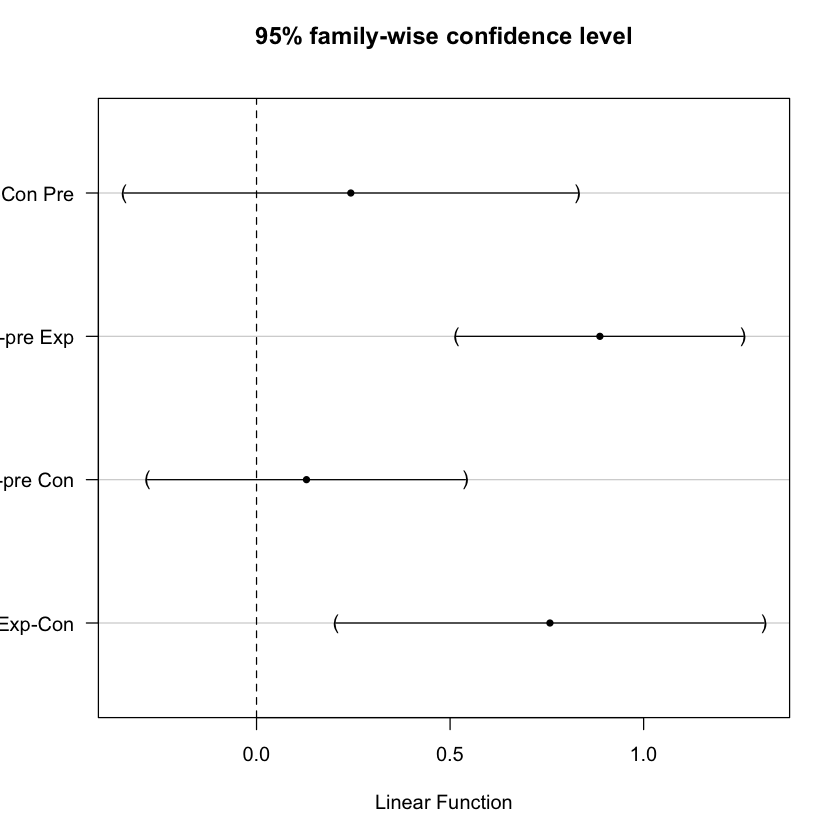

In [26]:
m_d2dp_g = lsmeans(a_d2dp_g, ~ group:measurement)
con_d2dp_g = summary(as.glht(contrast(m_d2dp_g, con_m21)), test = adjusted("Westfall"))
confint_d2dp_g = confint(con_d2dp_g)
plot(con_d2dp_g)
con_d2dp_g
confint_d2dp_g


	 Simultaneous Tests for General Linear Hypotheses

Linear Hypotheses:
                         Estimate Std. Error t value Pr(>|t|)    
Delayed post - pre == 0    0.9927     0.1684   5.895 5.61e-07 ***
Delayed post - post == 0   0.1057     0.1684   0.628    0.533    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- Westfall method)



	 Simultaneous Confidence Intervals

Fit: NULL

Quantile = 2.2737
95% family-wise confidence level
 

Linear Hypotheses:
                         Estimate lwr     upr    
Delayed post - pre == 0   0.9927   0.6098  1.3756
Delayed post - post == 0  0.1057  -0.2771  0.4886


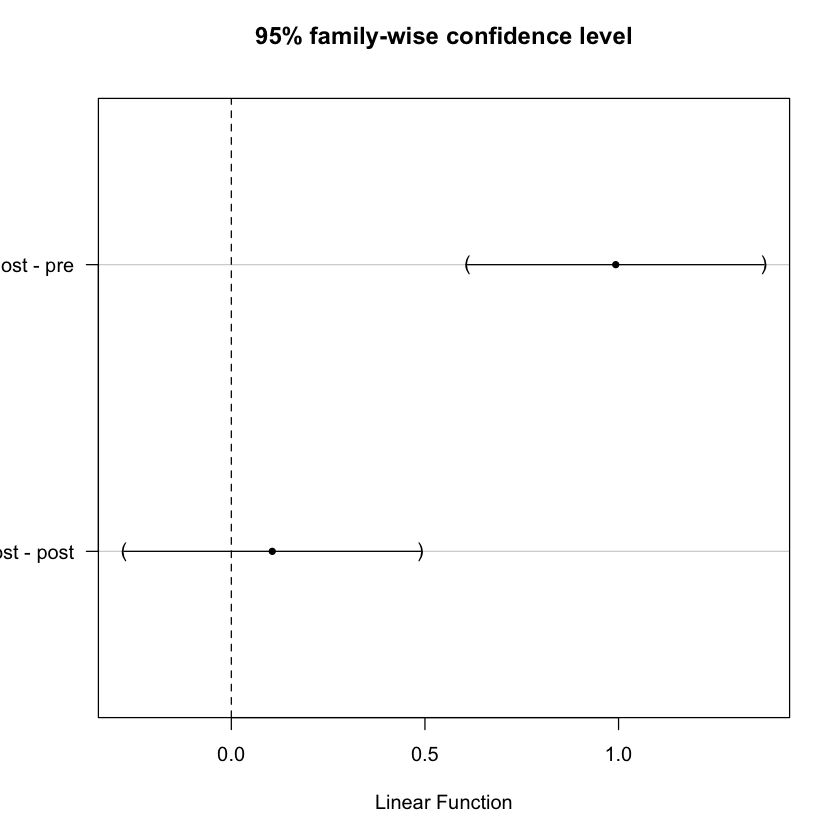

In [27]:
m_d2dp_e = lsmeans(a_d2dp_e, ~ measurement)
con_d2dp_e = summary(as.glht(contrast(m_d2dp_e, con_exp)), test = adjusted("Westfall"))
confint_d2dp_e = confint(con_d2dp_e)
plot(con_d2dp_e)
con_d2dp_e
confint_d2dp_e

### d2: bias

In [28]:
a_d2b_g <- aov_ez("id","bias", data_m12, between = "group", within = "measurement")
a_d2b_e <- aov_ez("id","bias", data_exp, within = "measurement")
knitr::kable(nice(a_d2b_g))
knitr::kable(nice(a_d2b_e))

Contrasts set to contr.sum for the following variables: group




|Effect            |df    |MSE  |F      |ges    |p.value |
|:-----------------|:-----|:----|:------|:------|:-------|
|group             |1, 47 |0.17 |1.94   |.03    |.17     |
|measurement       |1, 47 |0.05 |0.00   |<.0001 |.96     |
|group:measurement |1, 47 |0.05 |5.93 * |.03    |.02     |



|Effect      |df          |MSE  |F         |ges |p.value |
|:-----------|:-----------|:----|:---------|:---|:-------|
|measurement |1.87, 48.66 |0.06 |60.21 *** |.50 |<.0001  |

#### Contrasts


	 Simultaneous Tests for General Linear Hypotheses

Linear Hypotheses:
                      Estimate Std. Error t value Pr(>|t|)  
Exp-Con Pre == 0      -0.22985    0.09529  -2.412   0.0585 .
Post-pre Exp == 0      0.11675    0.06297   1.854   0.0692 .
Post-pre Con == 0     -0.11213    0.06976  -1.607   0.1138  
Post-pre Exp-Con == 0  0.22889    0.09398   2.435   0.0585 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- Westfall method)



	 Simultaneous Confidence Intervals

Fit: NULL

Quantile = 2.5035
95% family-wise confidence level
 

Linear Hypotheses:
                      Estimate  lwr       upr      
Exp-Con Pre == 0      -0.229847 -0.468410  0.008715
Post-pre Exp == 0      0.116754 -0.040892  0.274400
Post-pre Con == 0     -0.112131 -0.286775  0.062513
Post-pre Exp-Con == 0  0.228885 -0.006387  0.464157


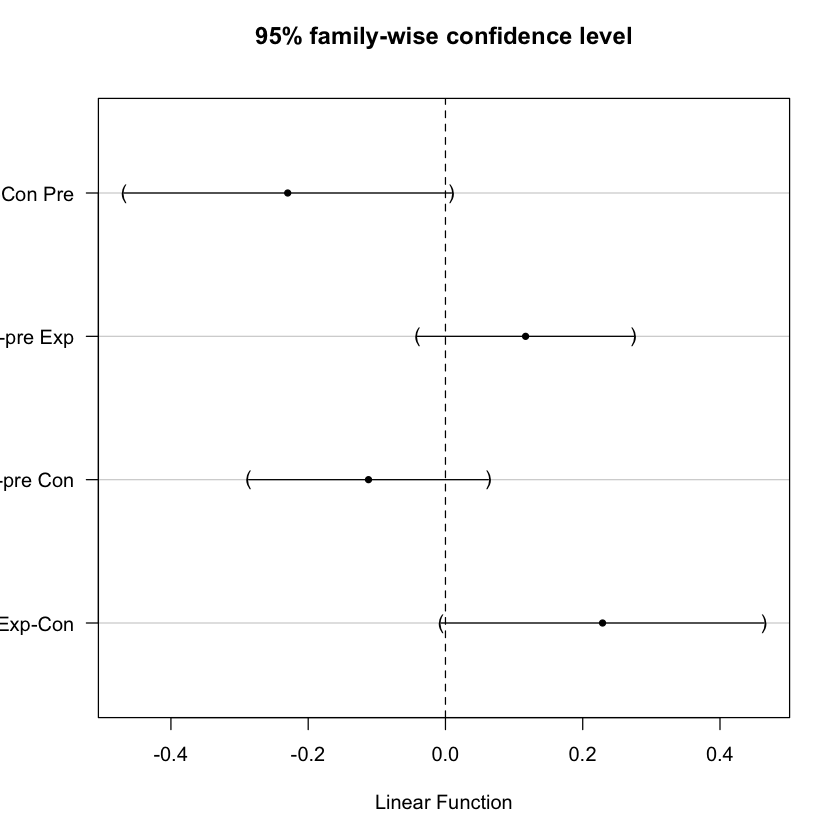

In [29]:
m_d2b_g = lsmeans(a_d2b_g, ~ group:measurement)
con_d2b_g = summary(as.glht(contrast(m_d2b_g, con_m21)), test = adjusted("Westfall"))
confint_d2b_g = confint(con_d2b_g)
plot(con_d2b_g)
con_d2b_g
confint_d2b_g


	 Simultaneous Tests for General Linear Hypotheses

Linear Hypotheses:
                         Estimate Std. Error t value Pr(>|t|)    
Delayed post - pre == 0  -0.54464    0.06434  -8.465   <1e-10 ***
Delayed post - post == 0 -0.66139    0.06434 -10.280   <1e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- Westfall method)



	 Simultaneous Confidence Intervals

Fit: NULL

Quantile = 2.2737
95% family-wise confidence level
 

Linear Hypotheses:
                         Estimate lwr     upr    
Delayed post - pre == 0  -0.5446  -0.6909 -0.3983
Delayed post - post == 0 -0.6614  -0.8077 -0.5151


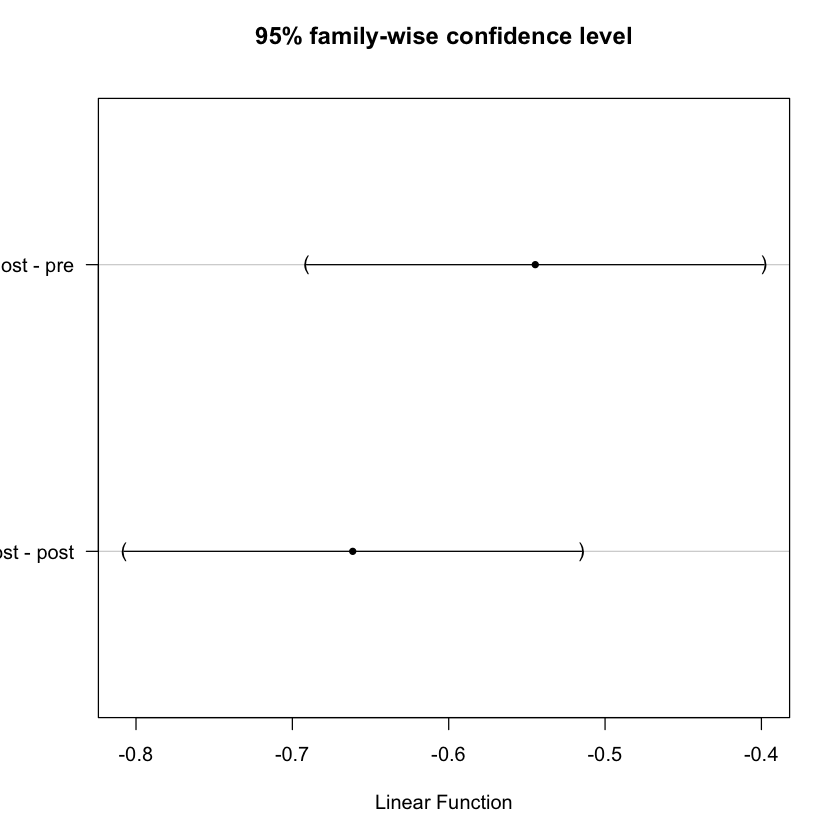

In [30]:
m_d2b_e = lsmeans(a_d2b_e, ~ measurement)
con_d2b_e = summary(as.glht(contrast(m_d2b_e, con_exp)), test = adjusted("Westfall"))
confint_d2b_e = confint(con_d2b_e)
plot(con_d2b_e)
con_d2b_e
confint_d2b_e

### Raven's Progressive Matrices

In [31]:
a_RPM_g <- aov_ez("id","Raven", data_m12, between = "group", within = "measurement")
a_RPM_e <- aov_ez("id","Raven", data_exp, within = "measurement")
knitr::kable(nice(a_RPM_g))
knitr::kable(nice(a_RPM_e))

Contrasts set to contr.sum for the following variables: group




|Effect            |df    |MSE    |F    |ges  |p.value |
|:-----------------|:-----|:------|:----|:----|:-------|
|group             |1, 47 |118.94 |1.30 |.02  |.26     |
|measurement       |1, 47 |10.02  |2.33 |.004 |.13     |
|group:measurement |1, 47 |10.02  |0.79 |.001 |.38     |



|Effect      |df          |MSE   |F    |ges  |p.value |
|:-----------|:-----------|:-----|:----|:----|:-------|
|measurement |1.66, 43.05 |11.15 |2.03 |.009 |.15     |


	 Simultaneous Tests for General Linear Hypotheses

Linear Hypotheses:
                      Estimate Std. Error t value Pr(>|t|)
Exp-Con Pre == 0        1.9478     2.3063   0.845    0.636
Post-pre Exp == 0       1.5556     0.8616   1.805    0.227
Post-pre Con == 0       0.4091     0.9545   0.429    0.670
Post-pre Exp-Con == 0   1.1465     1.2858   0.892    0.600
(Adjusted p values reported -- Westfall method)



	 Simultaneous Confidence Intervals

Fit: NULL

Quantile = 2.523
95% family-wise confidence level
 

Linear Hypotheses:
                      Estimate lwr     upr    
Exp-Con Pre == 0       1.9478  -3.8708  7.7664
Post-pre Exp == 0      1.5556  -0.6181  3.7293
Post-pre Con == 0      0.4091  -1.9990  2.8172
Post-pre Exp-Con == 0  1.1465  -2.0976  4.3905


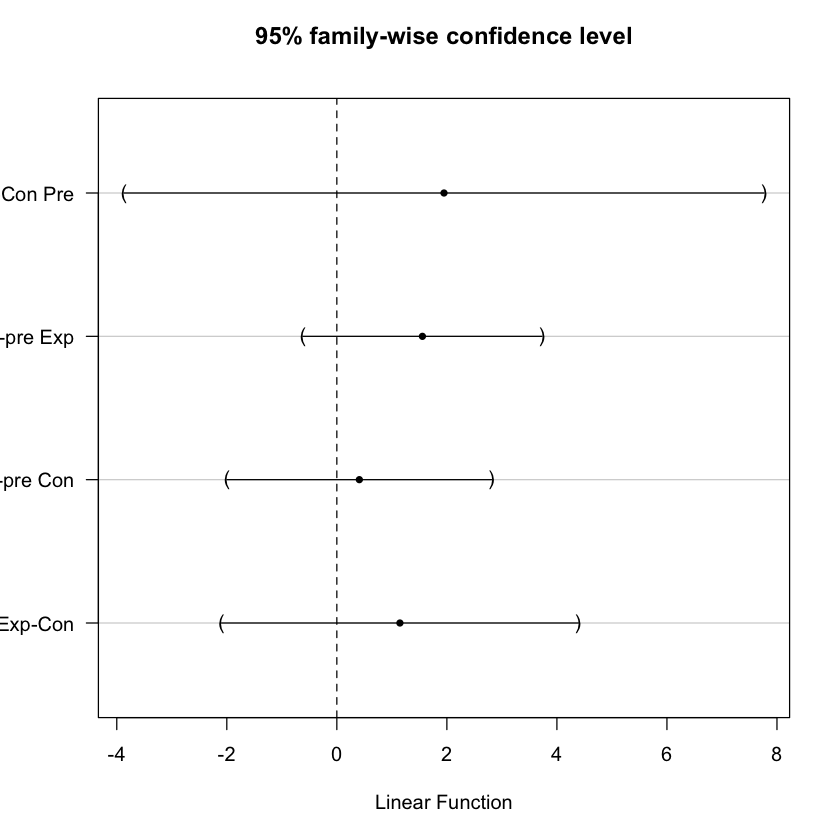

In [32]:
m_RPM_g = lsmeans(a_RPM_g, ~ group:measurement)
con_RPM_g = summary(as.glht(contrast(m_RPM_g, con_m21)), test = adjusted("Westfall"))
confint_RPM_g = confint(con_RPM_g)
plot(con_RPM_g)
con_RPM_g
confint_RPM_g


	 Simultaneous Tests for General Linear Hypotheses

Linear Hypotheses:
                         Estimate Std. Error t value Pr(>|t|)
Delayed post - pre == 0    1.2963     0.8267   1.568    0.212
Delayed post - post == 0  -0.2593     0.8267  -0.314    0.755
(Adjusted p values reported -- Westfall method)



	 Simultaneous Confidence Intervals

Fit: NULL

Quantile = 2.2737
95% family-wise confidence level
 

Linear Hypotheses:
                         Estimate lwr     upr    
Delayed post - pre == 0   1.2963  -0.5835  3.1761
Delayed post - post == 0 -0.2593  -2.1391  1.6206


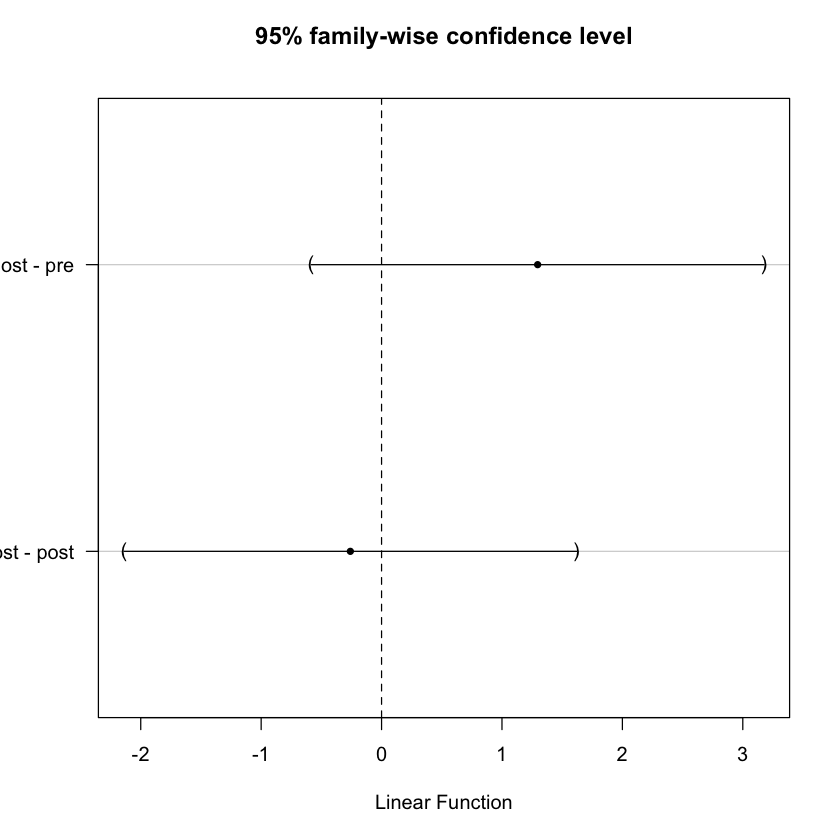

In [33]:
m_RPM_e = lsmeans(a_RPM_e, ~ measurement)
con_RPM_e = summary(as.glht(contrast(m_RPM_e, con_exp)), test = adjusted("Westfall"))
confint_RPM_e = confint(con_RPM_e)
plot(con_RPM_e)
con_RPM_e
confint_RPM_e

# Training effects vs progress in games

In [34]:
# game progress
gprog = read.csv('/Users/marcel/projects/treningi_Justyna/artykul/game_progress.csv')
gprog = gprog[,2:6]

In [35]:
rprog = data_m12$Raven[data_m12$group == 'Experimental' & data_m12$measurement == 1] - data_m12$Raven[data_m12$group == 'Experimental' & data_m12$measurement == 0]
dprog = data_m12$dprime[data_m12$group == 'Experimental' & data_m12$measurement == 1] - data_m12$dprime[data_m12$group == 'Experimental' & data_m12$measurement == 0]
bprog = data_m12$bias[data_m12$group == 'Experimental' & data_m12$measurement == 1] - data_m12$bias[data_m12$group == 'Experimental' & data_m12$measurement == 0]

In [36]:
data_tprog = data.frame(data_m12$id[1:27], gprog, rprog, dprog, bprog )
data_tprog = data_tprog[,-1]
names(data_tprog) = c('ID','Apples','Fish','EasterEggs','Jigsaw','Raven','dprime','Bias')

In [37]:
corr.test(data_tprog[,2:8])

Call:corr.test(x = data_tprog[, 2:8])
Correlation matrix 
           Apples  Fish EasterEggs Jigsaw Raven dprime  Bias
Apples       1.00 -0.22      -0.05   0.29 -0.17  -0.20 -0.32
Fish        -0.22  1.00       0.13  -0.15  0.06  -0.06 -0.03
EasterEggs  -0.05  0.13       1.00  -0.23 -0.19  -0.02 -0.09
Jigsaw       0.29 -0.15      -0.23   1.00  0.34  -0.15 -0.19
Raven       -0.17  0.06      -0.19   0.34  1.00  -0.20 -0.19
dprime      -0.20 -0.06      -0.02  -0.15 -0.20   1.00  0.40
Bias        -0.32 -0.03      -0.09  -0.19 -0.19   0.40  1.00
Sample Size 
[1] 27
Probability values (Entries above the diagonal are adjusted for multiple tests.) 
           Apples Fish EasterEggs Jigsaw Raven dprime Bias
Apples       0.00 1.00       1.00   1.00  1.00   1.00 1.00
Fish         0.26 0.00       1.00   1.00  1.00   1.00 1.00
EasterEggs   0.81 0.51       0.00   1.00  1.00   1.00 1.00
Jigsaw       0.14 0.47       0.25   0.00  1.00   1.00 1.00
Raven        0.40 0.75       0.33   0.09  0.00   1.00 1.0

#### Partial correlation between Apples and tests

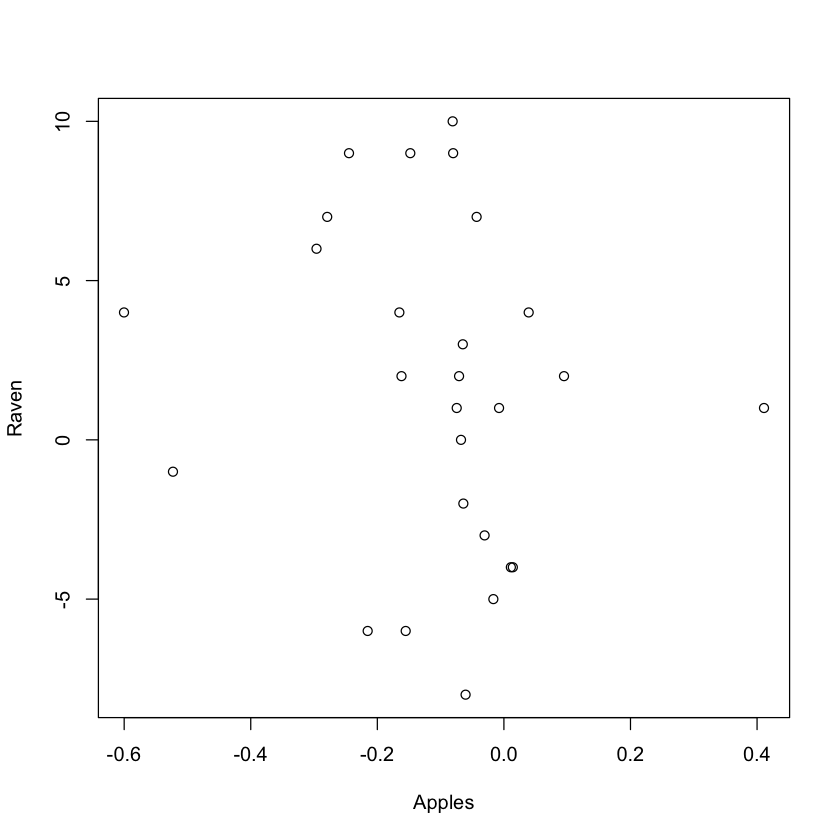

In [38]:
plot(Raven ~ Apples, data_tprog)

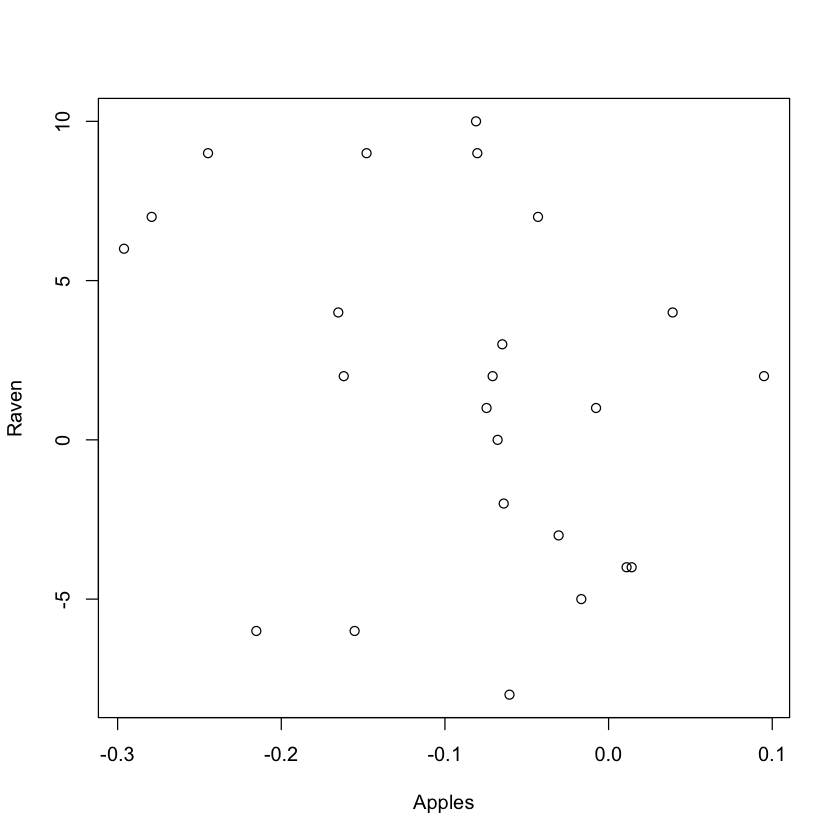

In [39]:
plot(Raven ~ Apples, data_tprog[data_tprog$Apples < 0.4 & data_tprog$Apples > -0.4,])

In [40]:
partial.r(data_tprog[,2:8],c(1,5,6,7),c(2,3,4))

partial correlations 
       Apples Raven dprime  Bias
Apples   1.00 -0.28  -0.19 -0.29
Raven   -0.28  1.00  -0.16 -0.16
dprime  -0.19 -0.16   1.00  0.38
Bias    -0.29 -0.16   0.38  1.00

In [41]:
pcor.test(data_tprog[,2],data_tprog[,6],data_tprog[,c(3,4,5)], method = 'spearman')
pcor.test(data_tprog[,2],data_tprog[,7],data_tprog[,c(3,4,5)], method = 'spearman')
pcor.test(data_tprog[,2],data_tprog[,8],data_tprog[,c(3,4,5)], method = 'spearman')

,estimate,p.value,statistic,n,gp,Method
1,-0.505637255394408,0.0117141199435197,-2.74895330125519,27,3,spearman


,estimate,p.value,statistic,n,gp,Method
1,-0.108959389644647,0.612289939502846,-0.514125839845201,27,3,spearman


,estimate,p.value,statistic,n,gp,Method
1,-0.212436904135255,0.318957660890337,-1.0196920937072,27,3,spearman


Apples seem to be negatively correlated with RPM and bias. The better the improvement in apples, the more improvement we see in Raven, but also a tendency to use a more liberal decision strategies.

#### Partial correlation between Fish and tests

In [42]:
partial.r(data_tprog[,2:8],c(2,5,6,7),c(1,3,4))

partial correlations 
        Fish Raven dprime  Bias
Fish    1.00  0.08  -0.12 -0.10
Raven   0.08  1.00  -0.23 -0.26
dprime -0.12 -0.23   1.00  0.35
Bias   -0.10 -0.26   0.35  1.00

In [43]:
pcor.test(data_tprog[,3],data_tprog[,6],data_tprog[,c(2,4,5)], method = 'spearman')
pcor.test(data_tprog[,3],data_tprog[,7],data_tprog[,c(2,4,5)], method = 'spearman')
pcor.test(data_tprog[,3],data_tprog[,8],data_tprog[,c(2,4,5)], method = 'spearman')

,estimate,p.value,statistic,n,gp,Method
1,0.0432578521390533,0.840933317360811,0.203087413207825,27,3,spearman


,estimate,p.value,statistic,n,gp,Method
1,-0.129869021362846,0.545290604294719,-0.614342473856432,27,3,spearman


,estimate,p.value,statistic,n,gp,Method
1,0.00333596421233043,0.987656929620162,0.015647146181827,27,3,spearman


There is no evidence that Fish progress is related to any task progress.

#### Partial correlation between Easter Eggs and tests

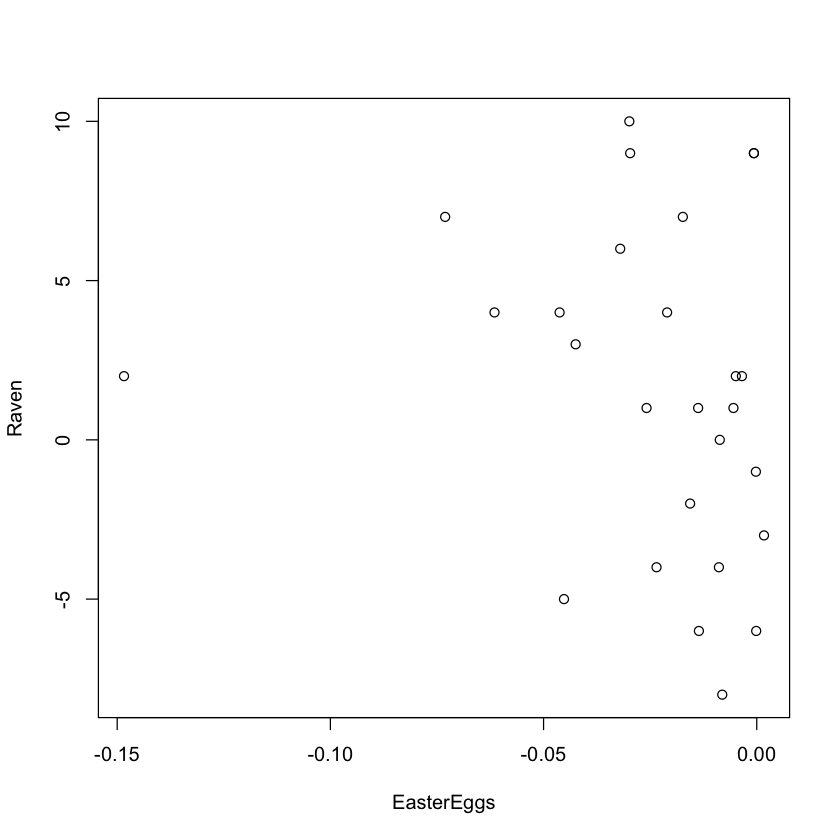

In [44]:
plot(Raven ~ EasterEggs, data_tprog)

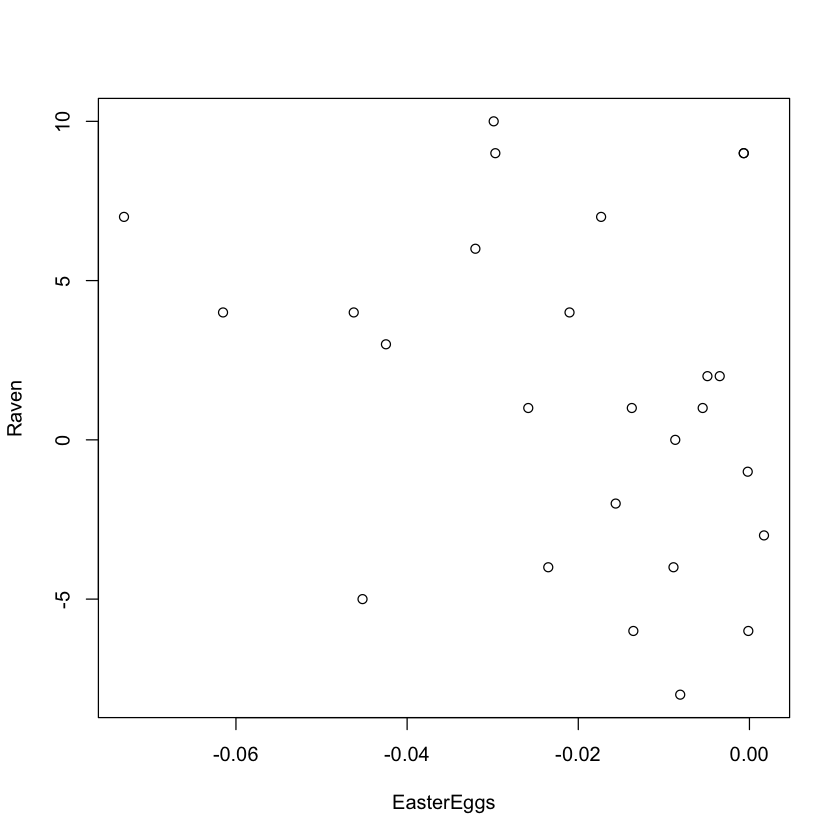

In [45]:
plot(Raven ~ EasterEggs, data_tprog[data_tprog$EasterEggs > -0.1,])

In [46]:
partial.r(data_tprog[,2:8],c(3,5,6,7),c(1,2,4))

partial correlations 
           EasterEggs Raven dprime  Bias
EasterEggs       1.00 -0.14  -0.04 -0.13
Raven           -0.14  1.00  -0.22 -0.24
dprime          -0.04 -0.22   1.00  0.35
Bias            -0.13 -0.24   0.35  1.00

In [47]:
pcor.test(data_tprog[,4],data_tprog[,6],data_tprog[,c(2,3,5)], method = 'spearman')
pcor.test(data_tprog[,4],data_tprog[,7],data_tprog[,c(2,3,5)], method = 'spearman')
pcor.test(data_tprog[,4],data_tprog[,8],data_tprog[,c(2,3,5)], method = 'spearman')

,estimate,p.value,statistic,n,gp,Method
1,-0.41921336488425,0.0414392588975915,-2.1657798418061,27,3,spearman


,estimate,p.value,statistic,n,gp,Method
1,0.139605828494842,0.515295928730576,0.661285241054512,27,3,spearman


,estimate,p.value,statistic,n,gp,Method
1,-0.038696514021622,0.857529354137307,-0.181638784958351,27,3,spearman


Similarly to Apples, the reduction in error rate correlates negatively with improvement in RPM.

#### Jigsaw

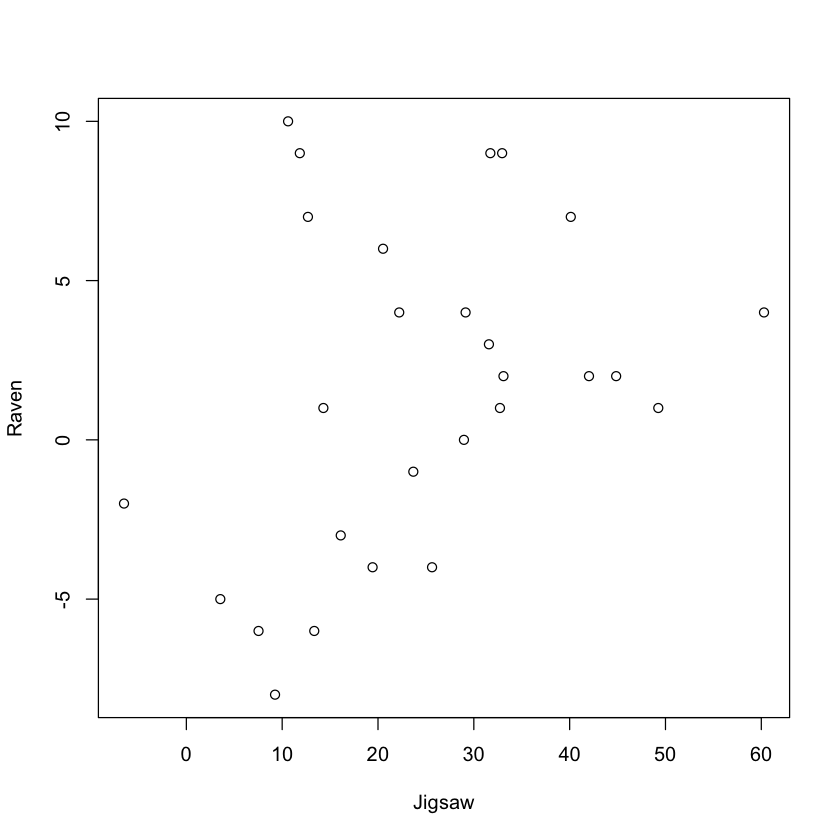

In [48]:
plot(Raven ~ Jigsaw, data_tprog)

In [49]:
partial.r(data_tprog[,2:8],c(4,5,6,7),c(1,2,3))

partial correlations 
       Jigsaw Raven dprime  Bias
Jigsaw   1.00  0.38  -0.11 -0.14
Raven    0.38  1.00  -0.25 -0.29
dprime  -0.11 -0.25   1.00  0.35
Bias    -0.14 -0.29   0.35  1.00

In [50]:
pcor.test(data_tprog[,5],data_tprog[,6],data_tprog[,c(2,3,4)], method = 'spearman')
pcor.test(data_tprog[,5],data_tprog[,7],data_tprog[,c(2,3,4)], method = 'spearman')
pcor.test(data_tprog[,5],data_tprog[,8],data_tprog[,c(2,3,4)], method = 'spearman')

,estimate,p.value,statistic,n,gp,Method
1,0.536075902537534,0.00693006130657499,2.97857007555862,27,3,spearman


,estimate,p.value,statistic,n,gp,Method
1,-0.133031879218927,0.535459631829299,-0.62957059795854,27,3,spearman


,estimate,p.value,statistic,n,gp,Method
1,-0.0638098293957819,0.767064356223332,-0.299905814606068,27,3,spearman


Jigsaw improvement is positively correlated with improvement in Raven.